In [155]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib.ticker import FuncFormatter

plt.rc("axes", titlesize="medium")
plt.rc("axes", titlelocation="left")
plt.rc("axes.spines", right=False)
plt.rc("axes.spines", top=False)
# sizets = (8, 4.5)
# plt.rc("figure", figsize=sizets)

legend_right = dict(loc="center left", bbox_to_anchor=[1, 0.5])

np.set_printoptions(precision=3)

# for colour palette
colours = ["#333446", "#7F8CAA", "#B8CFCE", "#EAEFEF"]
pallete = plt.cm.colors.ListedColormap(colours)

regression_c = ["#3D74B6", "#DC3C22", "#EAC8A6"]
regression_pallete = plt.cm.colors.ListedColormap(regression_c)

# --- image main
save_dir = "../portfolio/themes/blog/static/images"
file_name = "2025-07-17-nc-ns-clr"

# we will also set the random seed to 1
seed = 1
np.random.seed(seed)

In [156]:
m = 25
n = 1

ai = np.random.normal(size=(m, n))
bi = ai * 3.0 + 10 + np.random.normal(scale=1.0, size=(m, 1))

A = np.column_stack([ai, bi])

print(A[:5, :])

[[ 1.624 14.189]
 [-0.612  8.042]
 [-0.528  7.48 ]
 [-1.073  6.513]
 [ 0.865 13.127]]


In [157]:
a1 = np.random.uniform(0.6, 1.0, m)
b1 = 3 * a1 + 2 + np.random.normal(0, 0.1, m)

a2 = np.random.uniform(0.4, 0.8, m)
b2 = 3 * a2 + 5 + np.random.normal(0, 0.1, m)

a3 = np.random.uniform(0.2, 0.6, m)
b3 = 3 * a3 + 7 + np.random.normal(0, 0.1, m)

a4 = np.random.uniform(0.0, 0.4, m)
b4 = 3 * a4 + 10 + np.random.normal(0, 0.1, m)

a = np.concatenate([a1, a2, a3, a4])
b = np.concatenate([b1, b2, b3, b4])

A = np.column_stack([a, b])

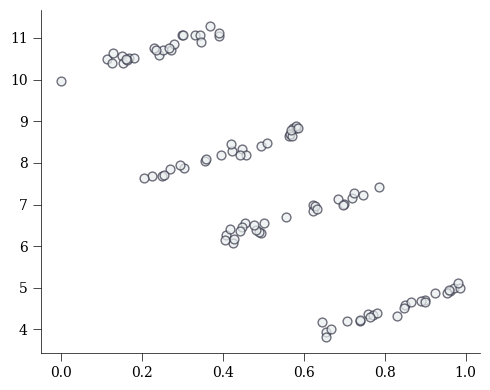

In [158]:
fig, ax = plt.subplots(figsize=(5, 4))
plt.scatter(
    A[:, 0],
    A[:, 1],
    color=colours[-1],
    edgecolors=colours[0],
    linewidths=1,
    alpha=0.7,
    s=40,
)

ax.tick_params(axis="both", labelfontfamily="Serif", labelsize=10, width=0.5, length=6)

for s in ["top", "left", "right", "bottom"]:
    ax.spines[s].set_linewidth(0.5)

plt.tight_layout()
plt.savefig(
    f"{save_dir}/{file_name}-1.svg", dpi=75, bbox_inches="tight", edgecolor="none"
)
plt.show()

In [159]:
def lingress(a, b, intercept=True):
    if intercept:
        a = np.vstack([a.flatten(), np.ones(len(a))]).T
    return np.linalg.inv(a.T @ a) @ a.T @ b

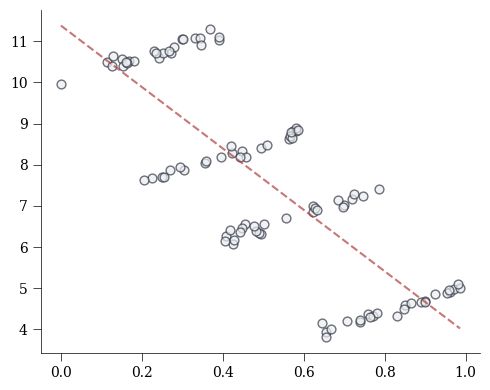

In [160]:
fig, ax = plt.subplots(figsize=(5, 4))

x_range = np.linspace(min(A[:, 0]), max(A[:, 0]), m * 4)
x, y = lingress(A[:, 0], A[:, 1], intercept=True)

plt.scatter(
    A[:, 0],
    A[:, 1],
    color=colours[-1],
    edgecolors=colours[0],
    linewidths=1,
    alpha=0.7,
    s=40,
)

plt.plot(
    x_range,
    x * x_range + y,
    color="#AF3E3E",
    alpha=0.7,
    linestyle="--",
)

ax.tick_params(axis="both", labelfontfamily="Serif", labelsize=10, width=0.5, length=6)

for s in ["top", "left", "right", "bottom"]:
    ax.spines[s].set_linewidth(0.5)

plt.tight_layout()
plt.savefig(
    f"{save_dir}/{file_name}-2.svg", dpi=75, bbox_inches="tight", edgecolor="none"
)
plt.show()

In [161]:
def h(x, y, a, b, p=2):
    return np.abs(np.inner(x, a) + y - b) ** p

In [162]:
def obj(x, y, a, b, p=2):
    return np.sum(h(x, y, a, b, p=p))

In [163]:
past = {1: lingress(A[:, 0], A[:, 1])}
print(obj(past[1][0], past[1][1], A[:, 0], A[:, 1], p=2))

196.65470176773368


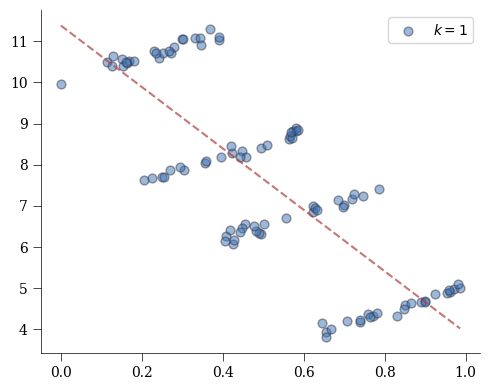

In [164]:
fig, ax = plt.subplots(figsize=(5, 4))

x_range = np.linspace(min(A[:, 0]), max(A[:, 0]), m * 4)
x, y = lingress(A[:, 0], A[:, 1], intercept=True)

plt.scatter(
    A[:, 0],
    A[:, 1],
    color=regression_c[0],
    edgecolors=colours[0],
    linewidths=1,
    alpha=0.5,
    s=40,
    label="$k=1$",
)

plt.plot(
    x_range,
    x * x_range + y,
    color="#AF3E3E",
    alpha=0.7,
    linestyle="--",
)

ax.tick_params(axis="both", labelfontfamily="Serif", labelsize=10, width=0.5, length=6)

for s in ["top", "left", "right", "bottom"]:
    ax.spines[s].set_linewidth(0.5)

plt.legend()
plt.tight_layout()
plt.savefig(
    f"{save_dir}/{file_name}-3.svg", dpi=75, bbox_inches="tight", edgecolor="none"
)

plt.show()

In [165]:
def auxiliary_function(u, v, A, errors):
    costs = 0.0
    for i in range(len(A)):
        e = h(A[i, 0], A[i, 1], u, v)
        costs += min(errors[i], e)
    return costs

In [166]:
past = {1: lingress(A[:, 0], A[:, 1])}

errors = []
for i in range(len(A)):
    e = h(past[1][0], past[1][1], A[i, 0], A[i, 1])
    errors.append(e)

print(errors)

[0.5014654524626956, 6.502112147640971, 7.160267546165251, 0.143248619230276, 1.793192040255794, 5.784078065433501, 0.7195268311836575, 2.802340151990046, 0.0010305121556489583, 0.004257045433847556, 0.3742828203256415, 0.20174349429597793, 4.524021733014102e-06, 2.6442142921035874, 3.5866544350908254, 0.5262733585477652, 1.6687617890081303, 0.9503323086898747, 0.0729435730171738, 0.2958745866811034, 5.731882578063797, 1.075990042098396, 1.3433356115039998, 0.7144249865357211, 1.9331236613174947, 4.290888977540467, 1.322484260392274, 1.9115743306020925, 1.672064240617499, 0.2831727093811613, 2.0010672146515396, 0.7267141022128168, 0.0669704935092613, 2.0395015392090245, 4.540417663835152, 2.4474326624904634, 3.4097374913132144, 2.93157128379553, 1.8805746153161105, 0.7630493476605793, 0.016349315749033182, 4.855694909454232, 4.070680267073564, 3.633197057616575, 0.06776165066093441, 1.9811907617171758, 1.183749130374977, 0.6428333461600703, 1.6845645971367857, 0.05815595812409501, 1.50

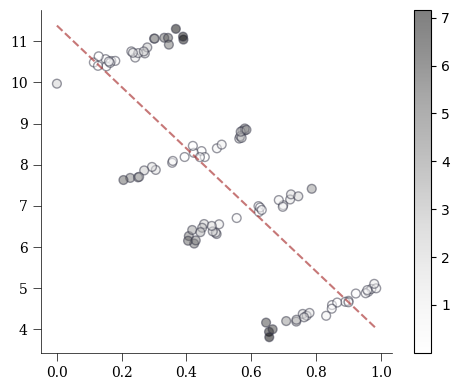

In [167]:
fig, ax = plt.subplots(figsize=(5, 4))

x_range = np.linspace(min(A[:, 0]), max(A[:, 0]), m * 4)
x, y = lingress(A[:, 0], A[:, 1], intercept=True)

plt.scatter(
    A[:, 0],
    A[:, 1],
    c=errors,
    cmap="Grays",
    # color=regression_c[0],
    edgecolors=colours[0],
    linewidths=1,
    alpha=0.5,
    s=40,
    label="$k=1$",
)

plt.plot(
    x_range,
    x * x_range + y,
    color="#AF3E3E",
    alpha=0.7,
    linestyle="--",
)

cbar = plt.colorbar()
ax.tick_params(axis="both", labelfontfamily="Serif", labelsize=10, width=0.5, length=6)

for s in ["top", "left", "right", "bottom"]:
    ax.spines[s].set_linewidth(0.5)

# plt.legend()
plt.tight_layout()
plt.savefig(
    f"{save_dir}/{file_name}-4.svg", dpi=75, bbox_inches="tight", edgecolor="none"
)

plt.show()

In [168]:
def get_best_fit(a, b, past):
    best_j = None
    error = np.inf

    for j, (x, y) in past.items():
        e = h(x, y, a, b)
        if e < error:
            error = e
            best_j = j

    return best_j

In [ ]:
def get_init_solutions(A, past, errors):
    candidates = []

    for a, b in A:
        j = get_best_fit(a, b, past)
        x_ab = past[j][0].copy()
        y_ab = b - x_ab * a

        B_ab = np.zeros((len(A), 2))
        for k, (c, d) in enumerate(A):
            if h(x_ab, y_ab, c, d) < errors[k]:
                B_ab[k] = (c, d)

        if len(B_ab) > 0:
            x_ab = lingress(B_ab[:, 0], B_ab[:, 1])[0]
            y_ab = lingress(B_ab[:, 0], B_ab[:, 1])[1]

        candidates.append((x_ab, y_ab))
    return candidates

In [ ]:
def get_d(u, v, A, errors):
    d = 0
    for i, (a, b) in enumerate(A):
        new_error = (u * a + v - b) ** 2
        improvement = errors[i] - new_error
        d += max(0, improvement)
    return d

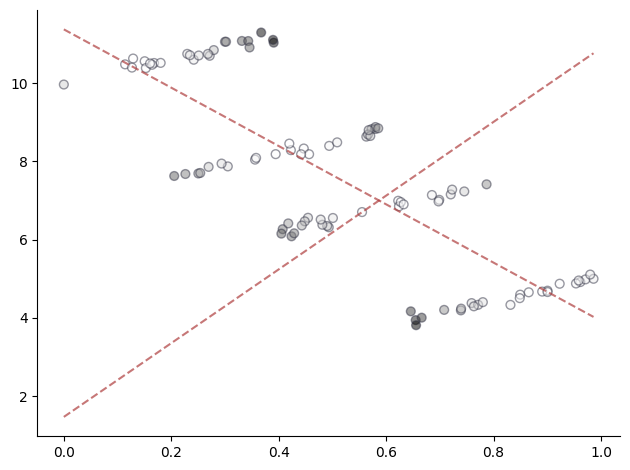

In [188]:
candidates = get_init_solutions(A, past, errors)

plt.scatter(
    A[:, 0],
    A[:, 1],
    c=errors,
    cmap="Grays",
    edgecolors=colours[0],
    linewidths=1,
    alpha=0.5,
    s=40,
    label="$k=1$",
)

plt.plot(
    x_range,
    x * x_range + y,
    color="#AF3E3E",
    alpha=0.7,
    linestyle="--",
)

plt.plot(
    x_range,
    candidates[0][0] * x_range + candidates[0][1],
    color="#AF3E3E",
    alpha=0.7,
    linestyle="--",
)

plt.tight_layout()
plt.show()